# Gravity Corrections
----------------

Today's goals:
* Finish up discussing the corrections applied to gravity data
* Work through an example
* Plan for lab.

## Components of an observed value:
$$ g_{total} = g_{sphere} + \Delta g_{latitude} + \Delta g_{free-air} + \Delta g_{eotvos} + \Delta g_{iso} + \Delta g_{drift} + \Delta g_{terrain} + \Delta g_{anomaly}$$

1) $g_{sphere}$ Reference spheroid
1) $\Delta g_{latitude} \rightarrow$ Reference Spheroid $\rightarrow$ Lattitude correction
1) $\Delta g_{free-air} \rightarrow$ Effect due to vertical gradient $\rightarrow$ Free Air correction
1) $\Delta g_{eotvos} \rightarrow$ Moving platform $\rightarrow$ Eotvos correction
1) $\Delta g_{iso} \rightarrow$ Isostatic effects $\rightarrow$ Isostatic correction
1) $\Delta g_{drift} \rightarrow$ Tidal and instrument drift $\rightarrow$ Drift correction
1) $\Delta g_{terrain} \rightarrow$ Field due to background mass above sea level $\rightarrow$ Bouguer and Terrain correction
1) $\Delta g_{anomaly} \rightarrow$ Local geology $\rightarrow$ What we want.

## Latitude Correction
* Removing the reference field from the spheroid
* International Gravity Formula (IGRF) (spheroid)
    * closed form expression:
    $ g_{ref} = g_{sphere} + \Delta g_{lat} = g_e \frac{1 + k \sin^2\phi}{\sqrt{1 - \eta^2 \sin^2\phi}} $
        * $g_e = 978.03267714$ Gal
        * $k = 0.00193185138639$
        * $\eta^2 = 0.0069437999013$
        * $\phi$ - latitude
    * Or approximate:
      $g = g_e (1 + \alpha sin^2\phi + \beta \sin^4\phi)$

$$ g_{total} - g_{sphere} - \Delta g_{lat} - ... $$

## Free Air Correction
![false](resources/8-fa-example.png)

* Assume we have absolute gravity data, we perform the correction by referencing to the ellipsoid, since the reference field we just removed is that of the ellipsoid.
* The correction for a point with elevation h is therefore given by:
    $$ \Delta g_{fa} = -2 \frac{h}{R}g_0 \approx -0.3086 \frac{mGal}{m} h$$
    * i.e., the free air gradient is -0.3086 mGal/m
* For relative gravity measurements, the background field is implicitly removed (missing).
    * The main concern is the false anomaly produced by elevation differences.
    * A correction based on this difference $\Delta h$ relative to a base station will suffice
    * But... $h$ is used customarily.

$$ g_{total} - g_{sphere} - \Delta g_{lat} - \Delta g_{free-air}... $$

## Drift Corrections

![corr](resources/drift_correction.png)

Correction method:
* approximate the drift curve by line segments, making a function for the gravity at the base station as a function of time.
    $$ g_{interp, base}(t) = \frac{g_2 - g_1}{t_2 - t_1}(t - t_1) + g_1 $$

$$ g_{total} - g_{sphere} - \Delta g_{lat} - \Delta g_{free-air} - \Delta g_{drift}... $$

### Eotvos Correction
* Correct for the alteration to the measurement due to the ship’s motion.
    * Differences in speed relative to spin of the earth
* Necessary for marine and airborne surveys.
* Need to have data for the speed and heading of the platform: 
* Eotvos correction is given by,
    $$\Delta g_{eotvos} = -2(\omega v \sin \lambda \cos \phi  + \frac{v^2}{R})$$
* For most surveys, v is very small (relative to R), so only first term is needed:
* approximate Eotvos correction is given by,
    $$\Delta g_{eotvos} \approx -2\omega v \sin \lambda \cos \phi$$

![eotvos](resources/8-eotvos.png)

$$ g_{total} - g_{sphere} - \Delta g_{lat} - \Delta g_{free-air} - \Delta g_{drift} - \Delta g_{eotvos}... $$

### Isostatic Correction

Isostatic Effect
* The fact that geoid does not correlate with excess or deficient  mass distributions can only mean the following: 
    1) The excess mass is compensated by mass deficient at depth
    1) while deficient mass is compensated by excess mass below. 
* This is called isostatic compensation.
* The mechanism can be best understood by the model of a lighter material floating on top of a heavier “fluid”. 

Two models:
1) Airy’s model: varying depth extent
2) Pratt’s model: laterally varying density

Airy's Model:
![airy](resources/8-airy.png)

Pratt's model:
![pratt](resources/8-pratt.png)

### Correction method
* Only for large surveys that are on the regional scale.
* Less definitive (don’t know the distribution of the causative mass)
* Correction can be done effectively using Airy’s model, 
    1) calculate the shape (depth extent) of the compensating mass based on surface topography 
    2) integrate the gravity effect by numerical integration.
* for small scale survey, isostatic effect can be lumped together with the “regional” field to be separated in the interpretation stage.


* Airy’s model: columns of equal mass
* derive the crustal thickness of Airy’s model
    $$d_m = h \frac{\rho_{top}}{\Delta \rho} + d_s$$
    * $d_s=30$ km
    * $\rho_{c}\approx2.67$ g/cc
    * $\Delta \rho=\rho_m - \rho_c \approx 0.35$ g/cc
* calculate the gravity effect due to the volume that deviates from the “standard” thickness below the shore line
    $$ \Delta g_{iso} = ... \text{ from a computer}$$

![iso](resources/9-airy-calc.png)

$$ g_{total} - g_{sphere} - \Delta g_{lat} - \Delta g_{free-air} - \Delta g_{drift} - \Delta g_{eotvos} - \Delta g_{iso}... $$

## Bouguer and Terrain Corrections
Bouguer and terrain corrections are traditionally discussed as two separate steps of data reduction,
* but they are actually related to the single task of removing the gravitational effect of the background density below the topo surface down to the sea level.
* The objective is to subtract the field produced by the background density and obtain the field due to the anomolous density: $\Delta \rho = \rho - \rho_b$.

![terr](resources/9-terrain_corr.png)

The field due to the background density is given by an integration over the entire volume of $\rho_B$
* This is conveniently calculated in two parts:
    1) Effect of a slab with thickness equal to the station elevation:
        * simple analytical solution available:$\rightarrow$ Bouguer Correction
    2) effect of excess and deficient mass introduced by the terrain:
        * numerical integration required:     $\rightarrow$         Terrain Correction

![terr](resources/9-terr-label.png)

$$\Delta g_{slab} + \Delta g_{T} = \Delta g_B$$
![parts](resources/9-terr-parts.png)

### Bouguer correction:
* This is the gravitational effect of a slab with thickness h and infinite horizontal extent.
    $$\Delta g_{slab} = 2 \pi \gamma \rho_B h $$
* Assuming a density of $\rho_B=2.67$ g/cc gives:
    $$\Delta g_{slab} = 0.1119\frac{mGal}{m} h $$
* Usually, the density is unknown, and it needs to be estimated by directly sampling or by using numerical techniques.

### Terrain Correction
This part calculates the effect of what’s left by the simple Bouguer correction.
* Essentially models the gravity response of this:
![terr](resources/9-terr-only.png)
* Don't do it yourself
* Make a computer do it for you...
  $$ \Delta g_{T} = F(\text{observation locations, terrain, density})$$

**note** Used to be done by hand using Hammer charts:
![hammer](resources/9-hammer.png)

$$ g_{total} - g_{sphere} - \Delta g_{lat} - \Delta g_{free-air} - \Delta g_{drift} - \Delta g_{eotvos} - \Delta g_{iso} - \Delta g_{B} = g_{anomaly}$$

## Corrections example, on a profile

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in some data

Let's plot and read in some data

In [21]:
data = pd.read_csv('resources/profile_data.csv')
data

,Station Label,Northing (m),Elevation (m),Time (h),obs (mGal)
0,Base,NaN,NaN,0.00,980081.07
1,0,0.0,1812.02,0.15,979724.81
2,1,50.0,1812.03,0.28,979724.96
3,2,100.0,1812.03,0.44,979725.13
4,3,150.0,1812.03,0.56,979725.28
5,4,200.0,1812.03,0.70,979725.44
6,5,250.0,1812.02,0.85,979725.62
7,6,300.0,1812.00,0.98,979725.79
8,7,350.0,1811.93,1.10,979725.97
9,Base,NaN,NaN,1.20,980081.94


First, let's get the indices of the base stations, and the indices of everywhere else.

In [22]:
base_inds = np.where(data['Station Label'] == "Base")[0]
station_inds = np.where(data['Station Label'] != "Base")[0]
base_inds

array([ 0,  9, 20, 32, 45])

Now let's plot the observed value at each station, according to its northing location

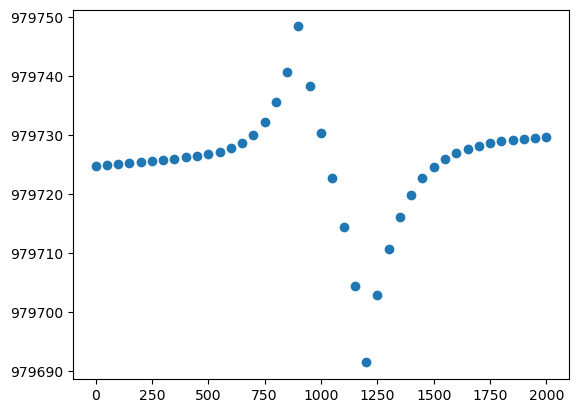

In [23]:
plt.scatter(data['Northing (m)'][station_inds], data['obs (mGal)'][station_inds])

# Drift-Correction

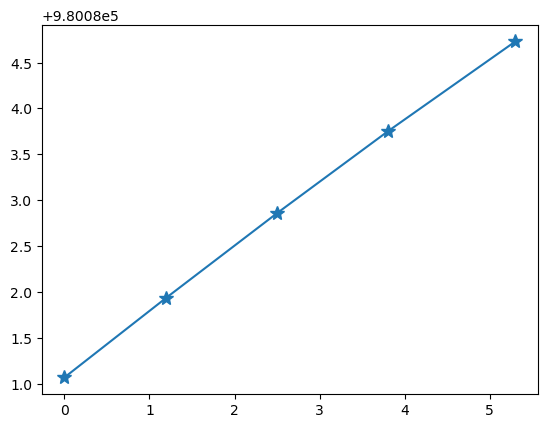

In [24]:
plt.plot(data['Time (h)'][base_inds], data['obs (mGal)'][base_inds], marker='*', markersize=10)

We can do some nice stuff with python here to make this easy!
So what do we want?
* Need a function that describes the base station as a function of time...
* Remove that variability from the observed data.

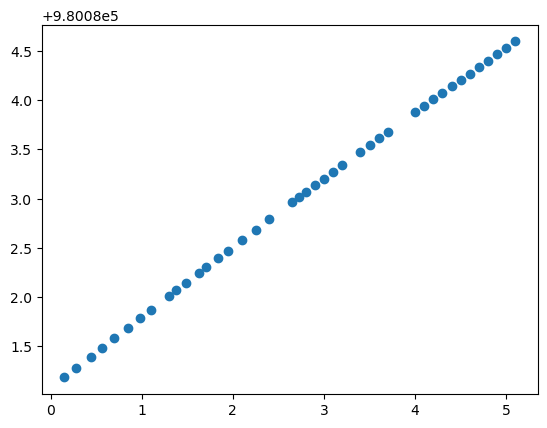

In [25]:
# part one sounds like an interpolation....
# Want to interpolate the values of the base station at times of the observations!
times = data['Time (h)']
obs = data['obs (mGal)']

g_drift = np.interp(times[station_inds], times[base_inds], obs[base_inds])

plt.scatter(times[station_inds], g_drift)

Text(0, 0.5, 'drift corrected (mGal)')

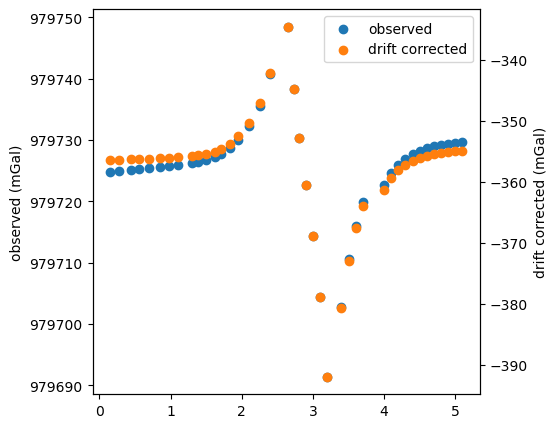

In [27]:
fig, ax1 = plt.subplots(figsize=(5, 5))
ax2 = ax1.twinx()

p1 = ax1.scatter(times[station_inds], obs[station_inds], color='C0', label='observed')
p2 = ax2.scatter(times[station_inds], obs[station_inds]-g_drift, color='C1', label='drift corrected')

ax1.legend(handles=[p1, p2])
ax1.set_ylabel('observed (mGal)')
ax2.set_ylabel('drift corrected (mGal)')

Now the other ones are pretty formulaic
# Free air

$$ \Delta g_{FA} = -0.3086 (mGal/m) * h $$

Text(0, 0.5, 'Elevations (m)')

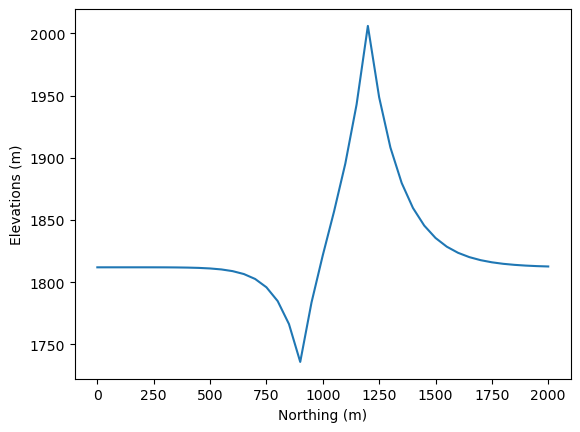

In [28]:
# Do the free air correction
profile = data['Northing (m)'][station_inds]
height = data['Elevation (m)'][station_inds]
plt.plot(profile, height)
plt.xlabel('Northing (m)')
plt.ylabel('Elevations (m)')

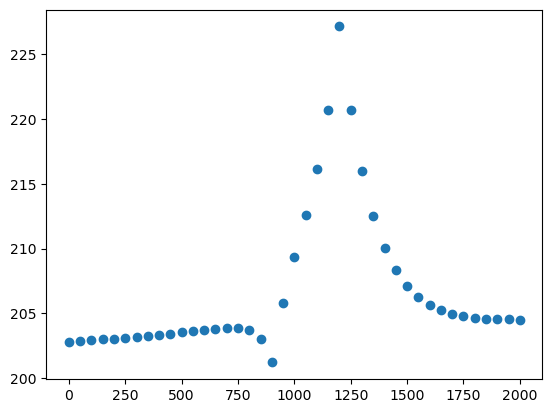

In [30]:
g_obs = data['obs (mGal)'][station_inds]

g_fa = -0.3086 * height


plt.scatter(profile, g_obs - g_drift - g_fa)

# Simple Bouguer correction

The simple bouguer correction removes an infinite slab with a thickness $h$ from the data.

$$\Delta g_{Bouguer} = 2 \pi \gamma \rho h$$

For $\rho = 2.67 g/cc$ this gives:

$$\Delta g_{booger} = 0.1119 (mGal/m) * h $$

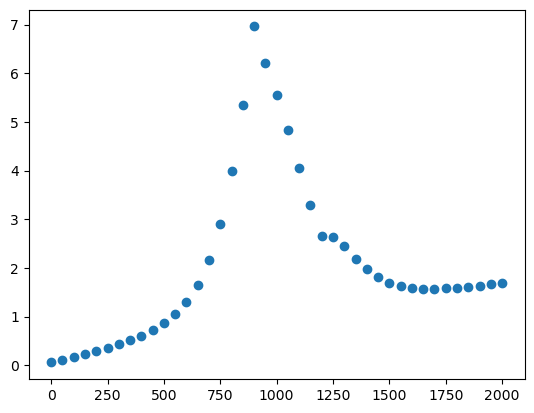

In [31]:
g_booger = 0.1119 * height # 2 pi gamma rho * h,  (rho=2.67)


plt.scatter(profile, g_obs - g_drift - g_fa - g_booger)

# Latitude correction

The full latitude correction is:

$$ \Delta g_{Lat} = g_e \left( \frac{1 + k \sin^2 \phi}{\sqrt{1-e^2 \sin^2 \phi}} - 1\right)$$

with $g_e = 978032.67714 mGal$, $k =  0.00193185138639$, and $e^2=0.00669437999013$ at latitude $\phi$


However for this data set, we do not know the latitude of each point, we are only given the latitude at the relative 0 North of the profile (45$\degree$) and the distance north from each point, thus we will use the local approximation:

$$ \Delta g_{Lat} = 0.001626 (mGal/m) * \sin\phi\cos\phi * \Delta y$$

where $\Delta y$ is the difference in northing from the reference latitude point at $\phi$

this data has a reference point of 45$\degree$

**note:** Remember to convert from degrees to radians for numpy!

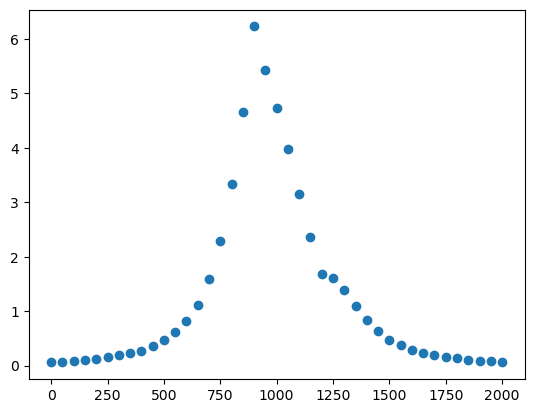

In [32]:
lat = np.pi/180 * 45

g_lat = 0.001626 * np.sin(lat) * np.cos(lat) * profile

plt.scatter(profile, g_obs - g_drift - g_fa - g_booger - g_lat)

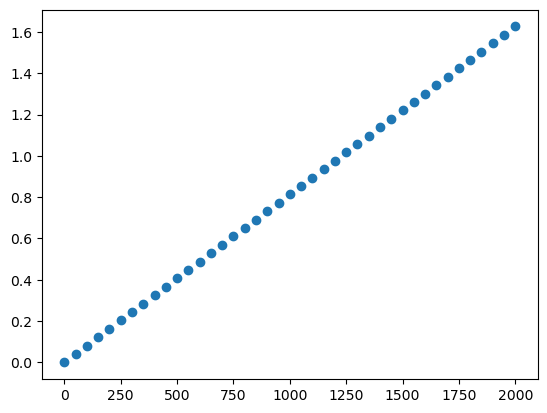

In [33]:
plt.scatter(profile, g_lat)

Text(0, 0.5, 'corrected (mGal)')

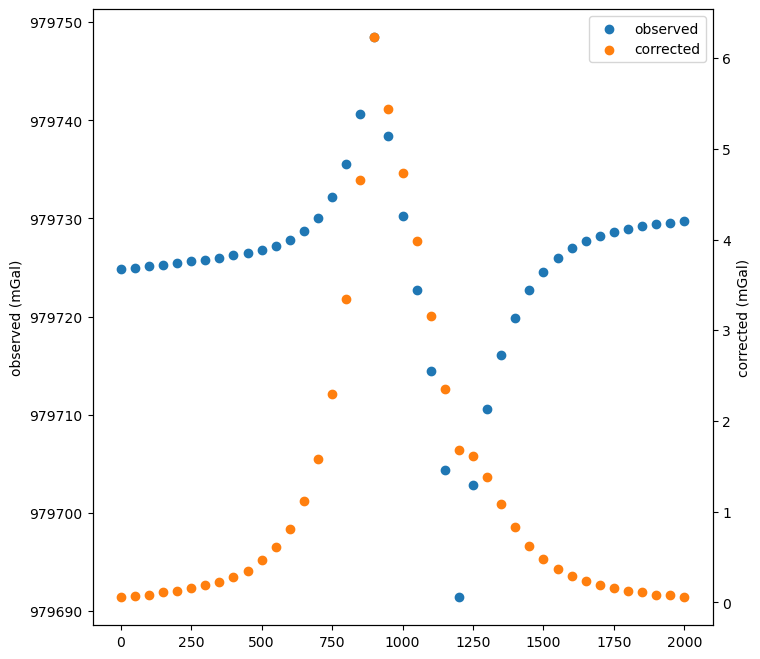

In [36]:

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

p1 = ax1.scatter(data['Northing (m)'][station_inds], data['obs (mGal)'][station_inds], label='observed', color='C0')
p2 = ax2.scatter(profile, g_obs - g_drift - g_fa - g_booger - g_lat, label='corrected', color='C1')

ax1.legend(handles=[p1, p2])
ax1.set_ylabel('observed (mGal)')
ax2.set_ylabel('corrected (mGal)')